In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [3]:
#데이터 표현
#범주형 변수
import os

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"adult.data"),
                  header=None, index_col=False,
                  names=['age','workclass','fnlwgt','education','education-num',
                        'marital-status','occupation','relationship','race','gender',
                        'capital-gain','capital-loss','hours-per-week','native-country',
                        'income'])
#예제들 위해 몇개의 열만 선택 합니다
data = data[['age','workclass','education','gender','hours-per-week','occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [ ]:
#데이터셋을 읽고 나면, 먼저 열에 어떤 의미 있는 범주형 데이터가 있는지 확인해보는 것이 
#좋은 것 같습니다.

In [4]:
#범주형 데티어 문자열 확인하기
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [ ]:
#정확한 두가지 값이 male과 female을 가지고 있어서 원-핫-인코딩으로 나타개니 좋겟네요

In [5]:
print("원본 특성:\n",list(data.columns),"\n")
data_dummies = pd.get_dummies(data)
print("get_dummis 후의 특성 : \n",list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummis 후의 특성 : 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_

In [ ]:
#연속형 특성인 age와 hours-per-week는 그대로지만 범주형 특성은 값마다 새로운 특성으로
#확장된게 보입니다

In [6]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
 # NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))


X.shape: (32561, 44) y.shape: (32561,)


In [ ]:
#출력값도 변환 됨을 볼 수가 있었습니다.

In [10]:
#데이터를 훈련/테스트 나누기 전 전체 데이터에 대해 dummy적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


In [ ]:
#전처리가 완료 됬으니 scikit-learn에서 사용할 수 있는 형태가 되어 테스트를 할수가 있었습니다.

In [13]:
#숫자로 표현된 범주형 특성
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
'범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [ ]:
#get_dummies를 사용하면 문자열 특성만 인코딩되며 숫자 특성은 바뀌지 않았습니다.
#그래서 숫자 특성도 가변수로 만들고 싶다면 columns 매개변수에 인코딩하고 싶은
#열을 명시해야 합니다.

In [15]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [17]:
#원-핫-인코더와 열변환기 scikit-learn으로 범주형 다루기
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [18]:
#변환되 특성에 해당하는 원본 범주형 변수 이름을 얻으려면 get_feature_names메소드 이용
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [ ]:
#oneHotencorder는 모든 특성을 범주형이라고 가정하기 때문에 바로 적용할 수 는 없다
#그래서 열변화기 크래스가 필요한 이유이다.
#열변환기는 입력 데이터에 있는 열마다 다른 변환은 적용할 수가 있다.

In [19]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct= ColumnTransformer([
    ("scaling",StandardScaler(),['age','hours-per-week']),
    ("onehot",OneHotEncoder(sparse=False),
     ['workclass','education','gender','occupation'])
])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#income을 제외한 모든 열을 추출합니다
data_features = data.drop("income",axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)

print(X_train_trans.shape)

(24420, 44)


In [ ]:
#pd.get_dummies를 사용했을 때와 같이 44개의 특성이 만들어 졌습니다

In [32]:
#바로 로지스틱 회귀에 사용해 보겠습니다

logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


In [ ]:
#이경우에는 데이터의 스케일이 영향을 미치치 못한 것 같습니다.

In [33]:
#Make_column_trasnformer 이용하기
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
  (['age','hours-per-week'],StandardScaler()),
    (['workclass','education','gender','occupation'],OneHotEncoder(sparse=False)))

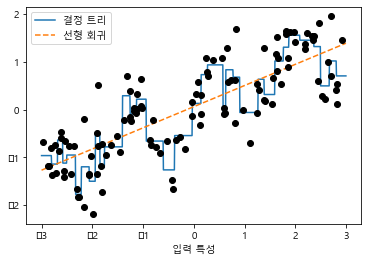

In [39]:
#구간 분할,이산화 그리고 선형 모델,트리모델
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
reg=DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,reg.predict(line),label="결정 트리")

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),'--',label="선형 회귀")
plt.plot(X[:,0],y,'o',c='k')
plt.xlabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [ ]:
#선형 모델은 선형 관계로만 모델링하므로 특성이 하나일 땐 직선
#결정트리는 훨씬 복잡한 모델을 만들 수 있습니다
#구간 불하은 연속형 데이터ㅔ 아주 강력한 성형 모델을 만드는 방법 하나 입니다.

In [41]:
from sklearn.preprocessing import KBinsDiscretizer
kb= KBinsDiscretizer(n_bins=10,strategy='uniform')
kb.fit(X)
print("bin edges : \n",kb.bin_edges_)

bin edges : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [ ]:
#구간 마다 데이터 포인트를 한번에 여러 개의 특성에 적용할 수가 있습니다.

In [43]:
X_binned=kb.transform(X)
X_binned
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

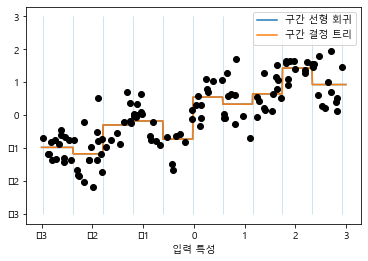

In [44]:
#각 데이터가 네번째 구간 열번째 구간에 포함되는게 보입니다.
#선형회귀와 결정트리로 비교 해보겠습니다.
kb = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label="구간 선형 회귀")

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label="구간 결정 트리")

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.xlabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [ ]:
#파선과 실선이 완전히 겹쳐졌습니다.
#이것으로 어떤 모델이든 그 구간의 포이튼에 대해서는 같은 값을 예측한다는 것입니다.
#구간을 나누니 선형 모델이 훨씬더 부드러워졌습니다.
#반면 결정트리는 덜 유연해졌습니다.

In [46]:
#상호작용과 다항식
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)
print(X_combined[:5])

(120, 11)
[[-0.75275929  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.        ]
 [ 2.70428584  0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.        ]
 [ 1.39196365  0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.        ]
 [ 0.59195091  0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.        ]
 [-2.06388816  0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


In [47]:
X_product = np.hstack([X_binned,X*X_binned])
print(X_product.shape)
print(X_product[:5])

(120, 20)
[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.75275929 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.39196365
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.59195091  0.
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0

In [ ]:
#기존 데이터를 이용하여 feature를 추가함으로써 데이터의 특성을 강화시킨다
#구간으로 나눈 Wave data에 원본 특성을 추가 : 11개의 특성
#입력특성이 하나라서 구간의 기울기가 같다
#X축 사이의 상호작용 특성을 추가

In [48]:
#연속형 특성을 확장
# 구간나누기,
#원본 추가
#원본과의 곱 추가
#다항식 추가
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False) #x **10
poly.fit(X)
X_poly = poly.transform(X) #X_poly.shape: (120, 10)

In [52]:
#보스톤 주택가격을 통한 비교

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,
                                                random_state=0)
scaler = MinMaxScaler()
#스케일 조정하기
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#다항식으로 특성 변환
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: ",X_train.shape)
print("X_train_poly.shape:",X_train_poly.shape)

X_train.shape:  (379, 13)
X_train_poly.shape: (379, 105)


In [53]:
# 이 데이터는 원래 특성이 13개인데 105개의 교차 특성으로 확장 된 것을 볼 수가 있었습니다

#이제 어떤 원본 특성이 곱해셔 새특성이 만들어 졌는지 보려면 get_feature_names로 확인합니다

print("다항 특성 이름 : \n",poly.get_feature_names())

다항 특성 이름 : 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수:{:.3f}".format(ridge.score(X_test_scaled,
                                                   y_test)))
# 상호작용 특성이 있을 때 점수: 0.753 #성능향상
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수:{:.3f}".format(ridge.score(X_test_poly,
                                                   y_test)))

상호작용 특성이 없을 때 점수:0.621
상호작용 특성이 없을 때 점수:0.753


In [ ]:
#확실히 특성이 있는 데이터와 없는 데이터에 대해 ridge를 사용해 성능이 뛰어난 것을 볼수가 있엇습니다.

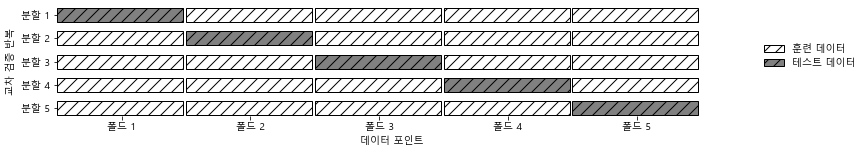

In [55]:
#모델 평가와 성능향상
# 교차 검증
mglearn.plots.plot_cross_validation()

In [ ]:
#k-겹 교차 검증(k-fold cross-validation)
#k=5 or k=10
#훈련 데이터를 k개의 부분 집합(폴드)으로 분할
#첫 번째 폴드를 테스트 세트로하고 나머지 폴드로 모델을 훈련
#테스트 폴드를 바꾸어 가며 모든 폴드가 사용될때까지 반복
#K 개의 정확도

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target,cv=3)
print("교차 검증 점수: {}".format(scores))
scores = cross_val_score(logreg, iris.data, iris.target,cv=5)
print("교차 검증 점수: {}".format(scores))
print("교차 검증 평균 점수 : {:.2f}".format(scores.mean()))

교차 검증 점수: [0.98 0.96 0.98]
교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 평균 점수 : 0.97


In [ ]:
# 정확도가 각 반복시 큰 차이를 보인다
#모델이 각 폴드에 의존적
#데이터 셋이 작은 경우

In [ ]:
#교차 검증
#모든 폴드가 테스트 대상이 되기 때문에 공평함
#10겹 교차 검증은 90%를 훈련에 사용하기 때문에 비교적 정확한 평가를 얻음
#모델이 훈련 데이터에 대한 민감도 파악

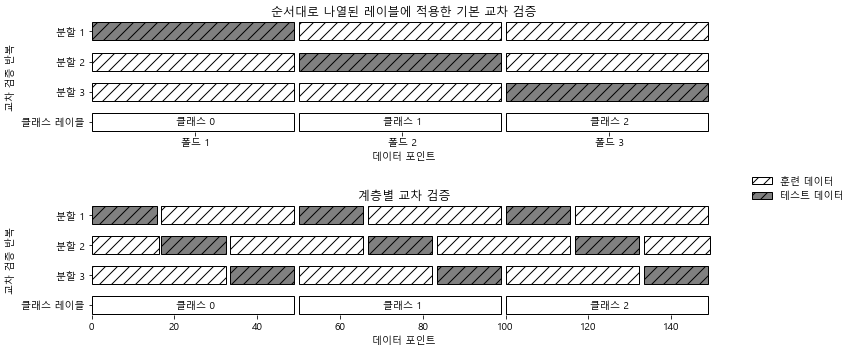

In [61]:
#계층별 교차 검증
mglearn.plots.plot_stratified_cross_validation()

In [ ]:
#클래스의 비율을 고려하여 분할

In [62]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))


교차 검증 점수:
[0. 0. 0.]


In [ ]:
#irsi 데이터가 각 클래스별로 저장되어 있습니다

In [63]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[0.98 0.96 0.96]


In [ ]:
#샘플의 순서를 뒤죽박죽으로 만든 것으로 결과를 더 좋게 만들 수 있었습니다.

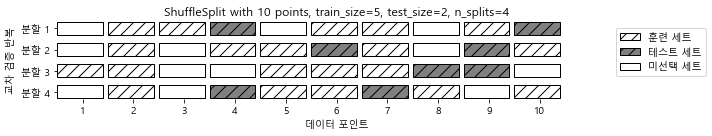

In [64]:
#LOOCV
#테스트 샘플 수 =1 인 k-겹 교차 검증
mglearn.plots.plot_shuffle_split()
#임의 분할 교차 검증:
#전체 데이터 중 훈련과 테스트 데이터의 사이즈를 정해주면 이를 n번 반복

In [65]:
#데이터 셋이 클 때는 시간이 오래 걸린다.
#작은 데이터셋에서는 공정한 결과가 나올 수 있다
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


In [66]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.96       0.97333333 0.97333333 0.94666667 0.94666667 0.97333333
 0.97333333 0.97333333 0.96       0.97333333]


In [ ]:
#임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로
#조절해야 할때 유용할 것 가ㅏㅌ습니다.

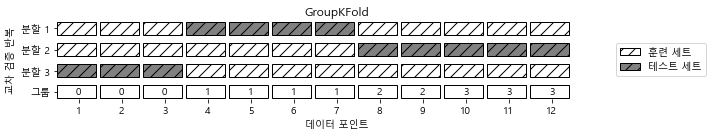

In [68]:
#그룹별 교차 검증
#데이터내에 연관된 그룹이 있을 경우
#타깃에 따라 폴드를 나누지 않고 입력 특성에 따라 폴드를 나누어야 할 경우
mglearn.plots.plot_group_kfold()

In [70]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.75       0.6        0.66666667]


In [ ]:
#그룹 분할은 각 분할에서 한그룹 전체가 훈련 세트 아니면 테스트세트인 것 같습니다.

In [72]:
#그리드 서치 (간단한 구현)
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,
                                                random_state=0)
print("훈련 세트의 크기 : {}     테스트 세트의 크기 : {}".format(
X_train.shape[0],X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: #36번 반복
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score: #max 찾기
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("최고 점수 : {:.2f}",format(best_score))
print("최적 매개변수 :",best_parameters)

훈련 세트의 크기 : 112     테스트 세트의 크기 : 38
최고 점수 : {:.2f} 0.9736842105263158
최적 매개변수 : {'C': 100, 'gamma': 0.001}


In [ ]:
#그리드 서치
#관심있는 매개변수의 조합을 시도 / 가장 성능이 높은 조합을 찾는다
#교수님이 말씀 하신 것처럼 이값을 최고의 점수라고는 못할 것 같습니다

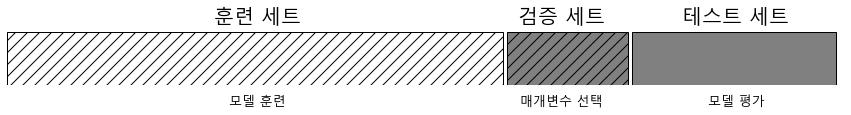

In [75]:
#Valiation set
mglearn.plots.plot_threefold_split()

In [ ]:
#이렇게 하는 이유는 모델을 만들 때 가능한 많은 데이터를 이용하기 위해서 입니다.